In [1]:
from openai import AzureOpenAI
import pandas as pd
import json, math, re, ast

# 1. Hard-coded Azure connection
client = AzureOpenAI(
    azure_endpoint="https://genai-openai-eus.openai.azure.com/",
    api_key="ae9587f69088409992009cb7bcf61436",
    api_version="2024-05-01-preview"
)

deployment_name = "genai-GPT4o-mini"
temperature = 0.0

# 2. Load CSV
df = pd.read_csv("biogpt_instruction_0.8_wrong_answers.csv")  # change to 0.85 if needed
questions = df["Question"].dropna().tolist()

batch_size = 40
batches = math.ceil(len(questions) / batch_size)
all_results = []

# 3. Ask Azure OpenAI in batches
for i in range(batches):
    batch_questions = questions[i*batch_size:(i+1)*batch_size]
    prompt = f"""
You are analyzing biomedical research questions for error analysis.

Classify each question into ONE of the following 5 categories:
1. Treatment/Intervention
2. Mechanism/Pathophysiology
3. Diagnosis/Screening
4. Prognosis/Outcome
5. Epidemiology/Risk

Return ONLY a valid JSON array (no explanation, no markdown) in this format:
[
  {{"Question": "...", "Category": "..."}}
]

Questions:
{chr(10).join([f"{idx+1}. {q}" for idx, q in enumerate(batch_questions)])}
"""

    print(f"Processing batch {i+1}/{batches} ...")

    response = client.chat.completions.create(
        model=deployment_name,
        messages=[{"role": "user", "content": prompt}],
        temperature=temperature
    )
    content = response.choices[0].message.content.strip()

    # Safe parsing of model output
    batch_result = []
    try:
        batch_result = json.loads(content)
    except Exception:
        json_text = re.findall(r"\[.*\]", content, re.S)
        if json_text:
            try:
                batch_result = ast.literal_eval(json_text[0])
            except Exception:
                batch_result = []
    if not batch_result:
        print(f"Could not parse batch {i+1}. Output snippet:\n{content[:300]}\n")
    else:
        all_results.extend(batch_result)

print(f"Parsed total items: {len(all_results)}")

# 4. Merge & Save
if all_results:
    cat_df = pd.DataFrame(all_results)
    cat_df.columns = [c.strip().lower() for c in cat_df.columns]
    df.columns = [c.strip().lower() for c in df.columns]

    if "question" in cat_df.columns and "question" in df.columns:
        merged_df = df.merge(cat_df, on="question", how="left")
    else:
        raise KeyError(f"Expected 'Question' column. Got: {cat_df.columns}")

    output_path = "biogpt_instruction_0.8_wrong_answers_categorized.csv"
    merged_df.to_csv(output_path, index=False)
    print(f"Saved categorized dataset to: {output_path}")
    print(merged_df.head())
else:
    print("No parsed data found — check LLM outputs above.")


Processing batch 1/1 ...
Parsed total items: 24
Saved categorized dataset to: biogpt_instruction_0.8_wrong_answers_categorized.csv
   pubmed id                                           question  \
0   23831910  Double balloon enteroscopy: is it efficacious ...   
1   17096624  Do patterns of knowledge and attitudes exist a...   
2   20337202  Continuation of pregnancy after antenatal cort...   
3    8985020  Does induction chemotherapy have a role in the...   
4   15800018  Are even impaired fasting blood glucose levels...   

                                             context  \
0  From March 2007 to January 2011, 88 DBE proced...   
1  To examine patterns of knowledge and attitudes...   
2  To determine the duration of continuing pregna...   
3  To assess the outcomes of patients with nasoph...   
4  Impaired fasting glucose (IFG) below the diagn...   

                                    generated answer  \
0  Question: Double balloon enteroscopy: is it ef...   
1  Question: Do p

In [2]:
from openai import AzureOpenAI
import pandas as pd
import json, math, re, ast

# 1. Hard-coded Azure connection
client = AzureOpenAI(
    azure_endpoint="https://genai-openai-eus.openai.azure.com/",
    api_key="ae9587f69088409992009cb7bcf61436",
    api_version="2024-05-01-preview"
)

deployment_name = "genai-GPT4o-mini"
temperature = 0.0

# 2. Load CSV
df = pd.read_csv("biogpt_instruction_0.85_wrong_answers.csv")  # change to 0.85 if needed
questions = df["Question"].dropna().tolist()

batch_size = 40
batches = math.ceil(len(questions) / batch_size)
all_results = []

# 3. Ask Azure OpenAI in batches
for i in range(batches):
    batch_questions = questions[i*batch_size:(i+1)*batch_size]
    prompt = f"""
You are analyzing biomedical research questions for error analysis.

Classify each question into ONE of the following 5 categories:
1. Treatment/Intervention
2. Mechanism/Pathophysiology
3. Diagnosis/Screening
4. Prognosis/Outcome
5. Epidemiology/Risk

Return ONLY a valid JSON array (no explanation, no markdown) in this format:
[
  {{"Question": "...", "Category": "..."}}
]

Questions:
{chr(10).join([f"{idx+1}. {q}" for idx, q in enumerate(batch_questions)])}
"""

    print(f"Processing batch {i+1}/{batches} ...")

    response = client.chat.completions.create(
        model=deployment_name,
        messages=[{"role": "user", "content": prompt}],
        temperature=temperature
    )
    content = response.choices[0].message.content.strip()

    # Safe parsing of model output
    batch_result = []
    try:
        batch_result = json.loads(content)
    except Exception:
        json_text = re.findall(r"\[.*\]", content, re.S)
        if json_text:
            try:
                batch_result = ast.literal_eval(json_text[0])
            except Exception:
                batch_result = []
    if not batch_result:
        print(f"Could not parse batch {i+1}. Output snippet:\n{content[:300]}\n")
    else:
        all_results.extend(batch_result)

print(f"Parsed total items: {len(all_results)}")

# 4. Merge & Save
if all_results:
    cat_df = pd.DataFrame(all_results)
    cat_df.columns = [c.strip().lower() for c in cat_df.columns]
    df.columns = [c.strip().lower() for c in df.columns]

    if "question" in cat_df.columns and "question" in df.columns:
        merged_df = df.merge(cat_df, on="question", how="left")
    else:
        raise KeyError(f"Expected 'Question' column. Got: {cat_df.columns}")

    output_path = "biogpt_instruction_0.85_wrong_answers_categorized.csv"
    merged_df.to_csv(output_path, index=False)
    print(f"Saved categorized dataset to: {output_path}")
    print(merged_df.head())
else:
    print("No parsed data found — check LLM outputs above.")


Processing batch 1/24 ...
Processing batch 2/24 ...
Processing batch 3/24 ...
Processing batch 4/24 ...
Processing batch 5/24 ...
Processing batch 6/24 ...
Processing batch 7/24 ...
Processing batch 8/24 ...
Processing batch 9/24 ...
Processing batch 10/24 ...
Processing batch 11/24 ...
Processing batch 12/24 ...
Processing batch 13/24 ...
Processing batch 14/24 ...
Processing batch 15/24 ...
Processing batch 16/24 ...
Processing batch 17/24 ...
Processing batch 18/24 ...
Processing batch 19/24 ...
Processing batch 20/24 ...
Processing batch 21/24 ...
Processing batch 22/24 ...
Processing batch 23/24 ...
Processing batch 24/24 ...
Parsed total items: 932
Saved categorized dataset to: biogpt_instruction_0.85_wrong_answers_categorized.csv
   pubmed id                                           question  \
0   21645374  Do mitochondria play a role in remodelling lac...   
1   16418930  Landolt C and snellen e acuity: differences in...   
2    9488747  Syncope during bathing in infants, a p

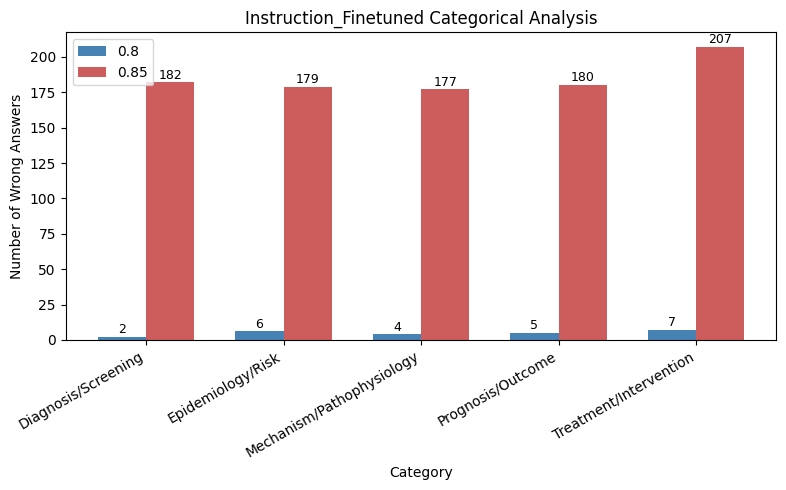

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Load categorized CSVs
df_08 = pd.read_csv("biogpt_instruction_0.8_wrong_answers_categorized.csv")
df_085 = pd.read_csv("biogpt_instruction_0.85_wrong_answers_categorized.csv")

# 2. Normalize column names
df_08.columns = [c.strip().lower() for c in df_08.columns]
df_085.columns = [c.strip().lower() for c in df_085.columns]

# 3. Count number of errors per category
count_08 = df_08["category"].value_counts().sort_index()
count_085 = df_085["category"].value_counts().sort_index()

# 4. Merge into a single DataFrame
comparison = pd.DataFrame({
    "Threshold_0.8": count_08,
    "Threshold_0.85": count_085
}).fillna(0).astype(int)

# 5. Plot side-by-side bars with labels
categories = comparison.index
x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars_08 = ax.bar(x - width/2, comparison["Threshold_0.8"], width, label="0.8", color="steelblue")
bars_085 = ax.bar(x + width/2, comparison["Threshold_0.85"], width, label="0.85", color="indianred")

# Add labels on top of each bar
for bar in bars_08:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{int(height)}", ha="center", va="bottom", fontsize=9)

for bar in bars_085:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{int(height)}", ha="center", va="bottom", fontsize=9)

ax.set_xlabel("Category")
ax.set_ylabel("Number of Wrong Answers")
ax.set_title("Instruction_Finetuned Categorical Analysis")
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=30, ha="right")
ax.legend()

plt.tight_layout()
plt.show()
